# **Document Digitalization**: extracting information from images


**But Général**: Objectif: Introduction, familiarisation avec la Computer Vision et Application pour le cas d’usage specifique

Ce Notebook de decompose en deux grandes parti:

1.   Image Processing avec OpenCV
2.   Extraction d'information avec LayoutParser, OCR

Le but de la partie 1 consiste à se familiariser avec opencv pour les taches de traitement d'image, une des bases du computer vision

La seconde partie consiste à mettre en place un system pour la extraire les informtions textuelle contenu dans un image 








## Preparation Env

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install layoutparser torchvision && pip install "detectron2@git+https://github.com/facebookresearch/detectron2.git@v0.6#egg=detectron2"
#Install paddle-OCR
!python -m pip install paddlepaddle-gpu==2.1.3.post112 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
!python3 -c 'import paddle; print(paddle.__version__)'
!pip install "paddleocr>=2.6.0.3" # Recommend to use version 2.0.1+
!pip3 install paddleclas>=2.4.3

### Image Processing avec OpenCV

A la fin de cette partie, les participants se familariserons avec les images ainsi que les outils de traitement d'image avec python, et devraient être capable d'effectuer les taches suivantes: 

1.   Changement de couche de couleur
2.   Convertion d"une image en niveau de gris
3.   Seuillage
4.   Blurring
5.   Face detection



In [ ]:
!wget https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg

--2022-12-15 08:40:08--  https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg
Resolving iiif.lib.ncsu.edu (iiif.lib.ncsu.edu)... 152.14.136.80
Connecting to iiif.lib.ncsu.edu (iiif.lib.ncsu.edu)|152.14.136.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167800 (164K) [image/jpeg]
Saving to: ‘default.jpg’

default.jpg         100%[===================>] 163.87K  --.-KB/s    in 0.1s    

2022-12-15 08:40:08 (1.46 MB/s) - ‘default.jpg’ saved [167800/167800]



In [ ]:
#librairies necessaires
import matplotlib.pyplot as plt
import cv2
import numpy as np

image = cv2.imread('/content/drive/MyDrive/photos Indabax-Workshops/default.jpg')
print('La taille de l image est de:',image.shape[:2])

La taille de l image est de: (552, 800)


## Changement de canal 

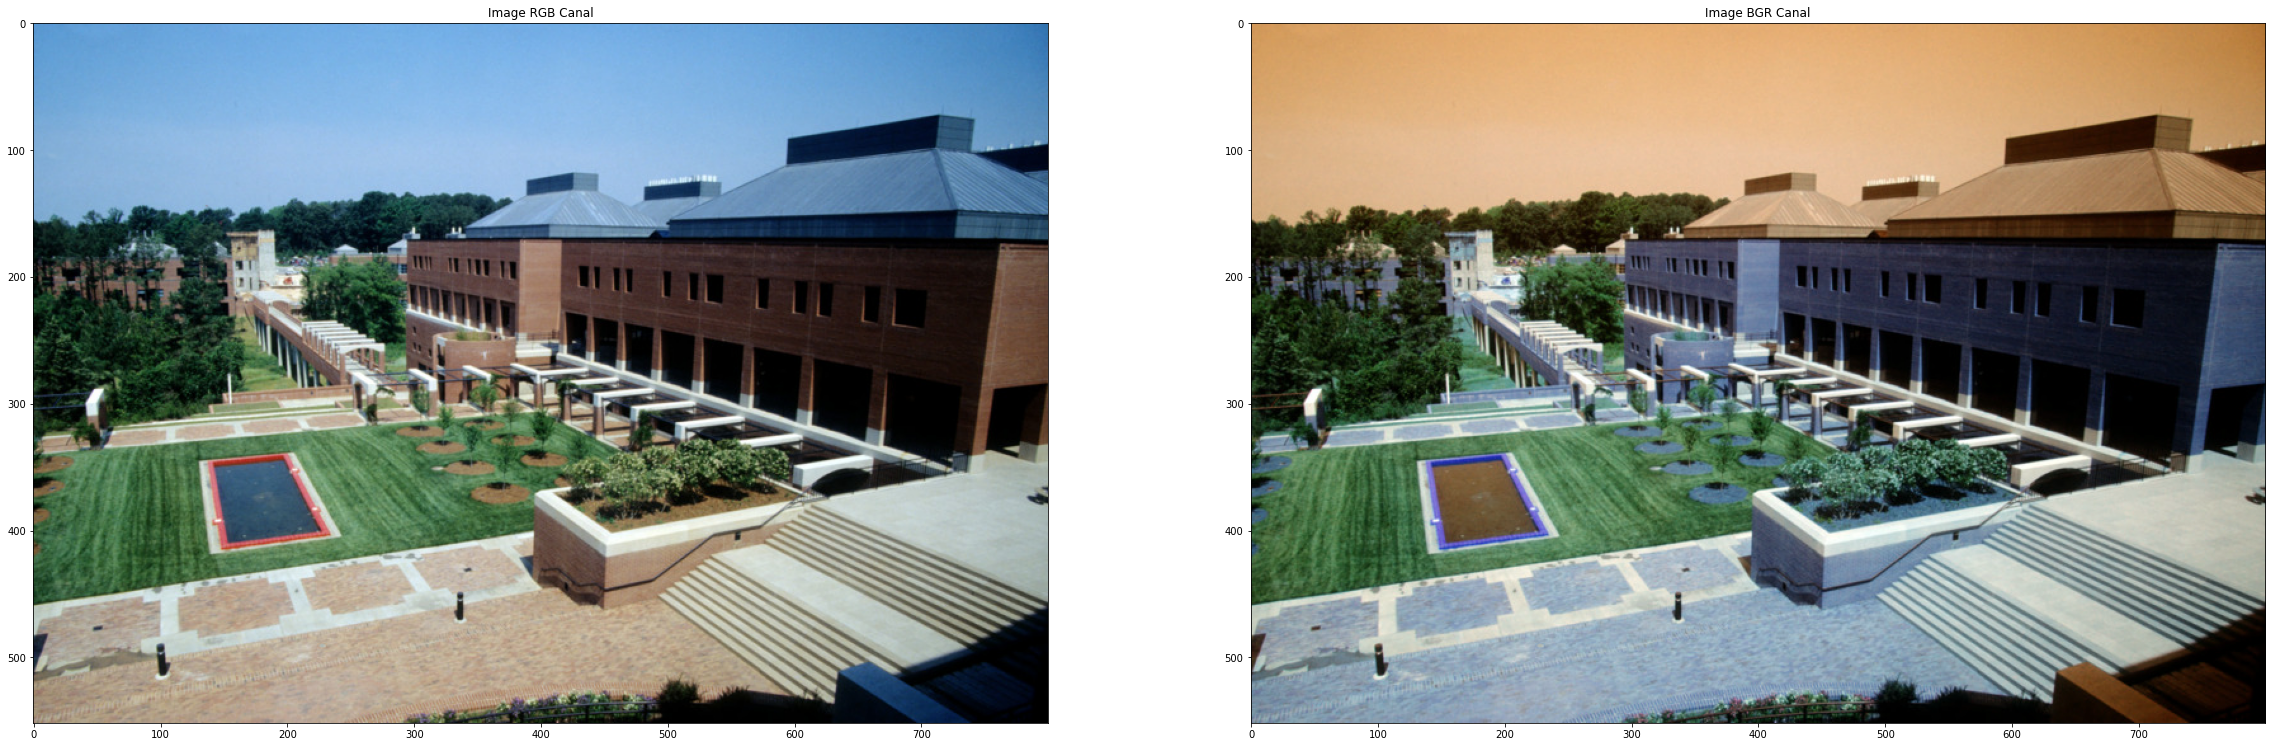

In [ ]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(40,40))
plt.subplot(121)
plt.imshow(image_rgb)
plt.title('Image RGB Canal')
plt.subplot(122)
plt.imshow(image)
plt.title('Image BGR Canal')
plt.show()

## Convertion d"une image en niveau de gris

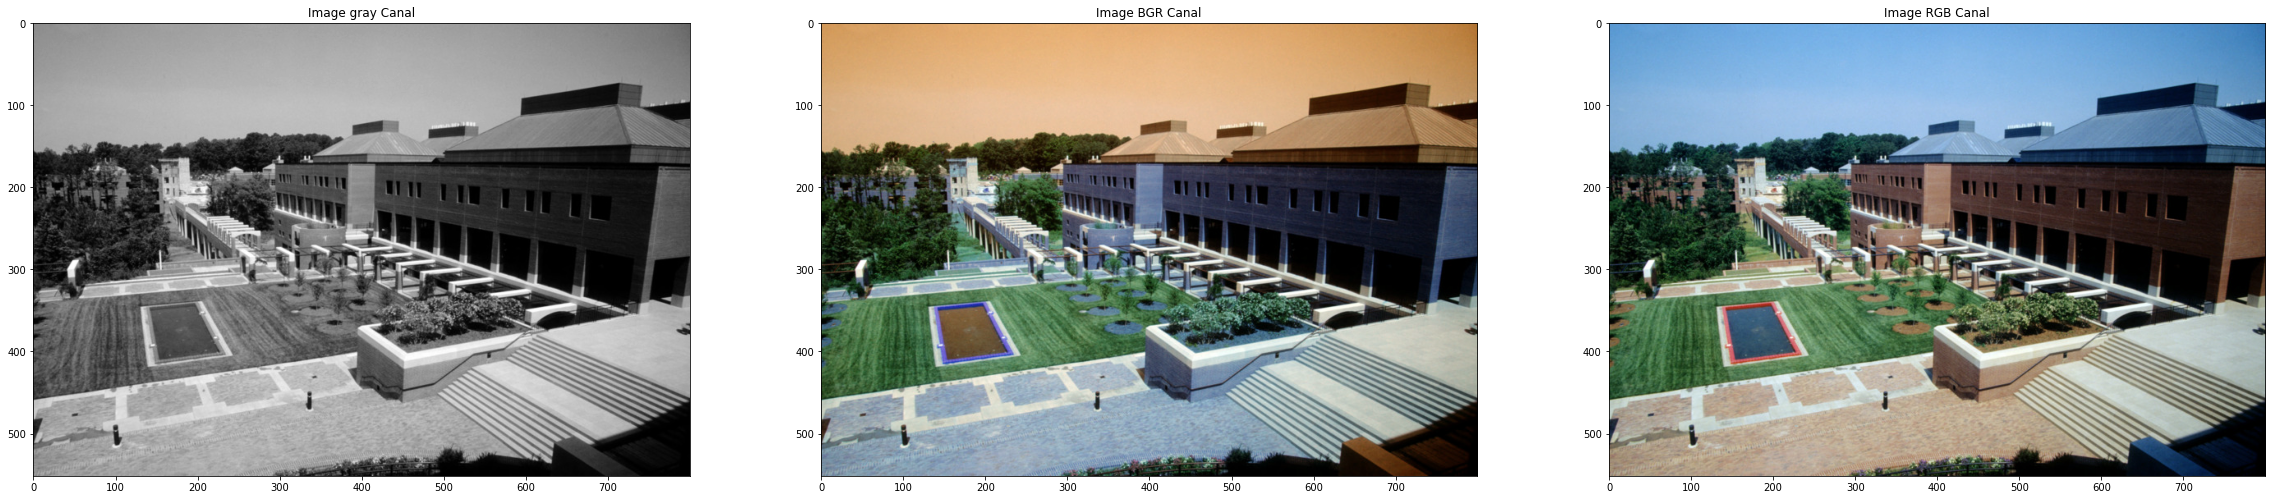

In [ ]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(40,40))
plt.subplot(131)
plt.imshow(image_gray, cmap='gray')
plt.title('Image gray Canal')
plt.subplot(132)
plt.imshow(image)
plt.title('Image BGR Canal')
plt.subplot(133)
plt.imshow(image_rgb)
plt.title('Image RGB Canal')
plt.show()

# Seuillage
Le seuillage consiste a convertir une image donnée en une image binaire (que des pixels 0 et 1)
Le principe est tout d'abord de convertir l'image en un seul couche et après de définir un seuil pour laquelle au dessous de cette valeur, les pixels seront remis à 0 et en dessus à 1

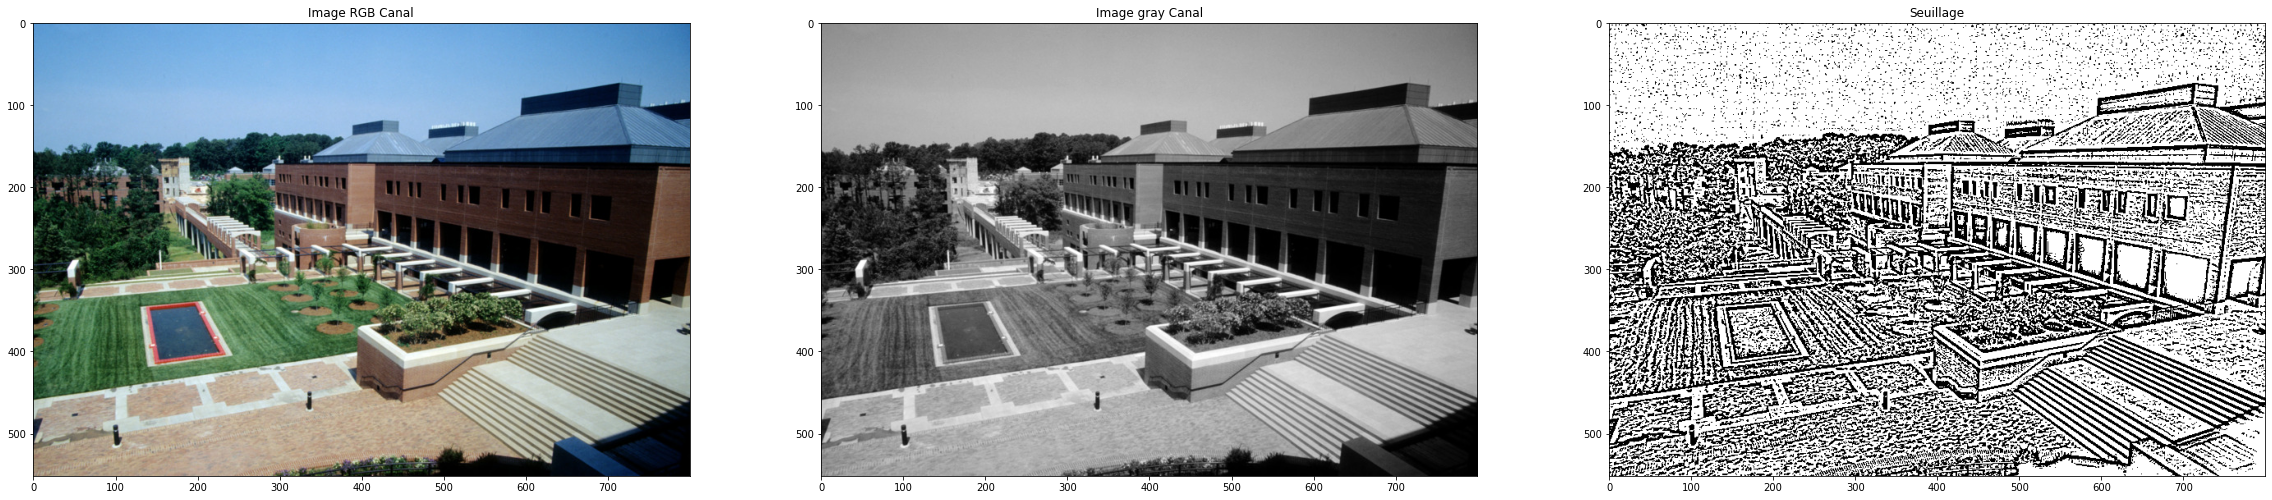

In [ ]:
image = cv2.imread('/content/drive/MyDrive/photos Indabax-Workshops/default.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

plt.figure(figsize=(40,40))
plt.subplot(132)
plt.imshow(image_gray, cmap='gray')
plt.title('Image gray Canal')
plt.subplot(133)
plt.imshow(th3, cmap="gray")
plt.title('Seuillage')
plt.subplot(131)
plt.imshow(image_rgb)
plt.title('Image RGB Canal')
plt.show()

## Floutage

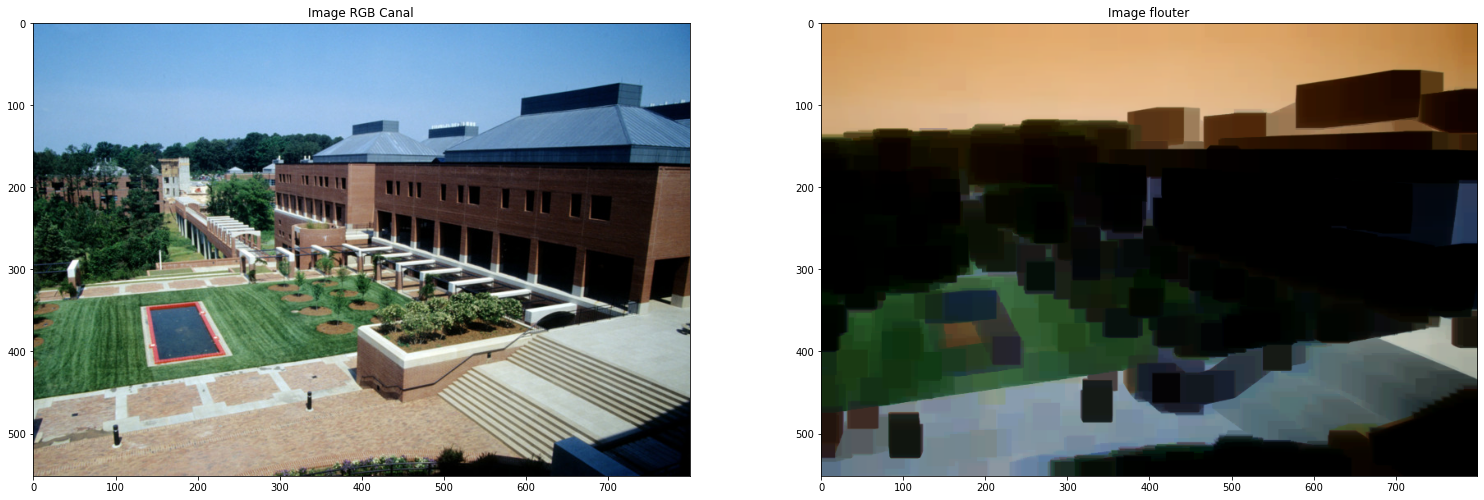

In [ ]:
image = cv2.imread('/content/drive/MyDrive/photos Indabax-Workshops/default.jpg')

kernel = np.ones((33, 33), np.uint8)
image_erode = cv2.erode(image, kernel, cv2.BORDER_REFLECT)

plt.figure(figsize=(40,40))
plt.subplot(132)
plt.imshow(image_erode)
plt.title('Image flouter')
plt.subplot(131)
plt.imshow(image_rgb)
plt.title('Image RGB Canal')
plt.show()


## Face detection

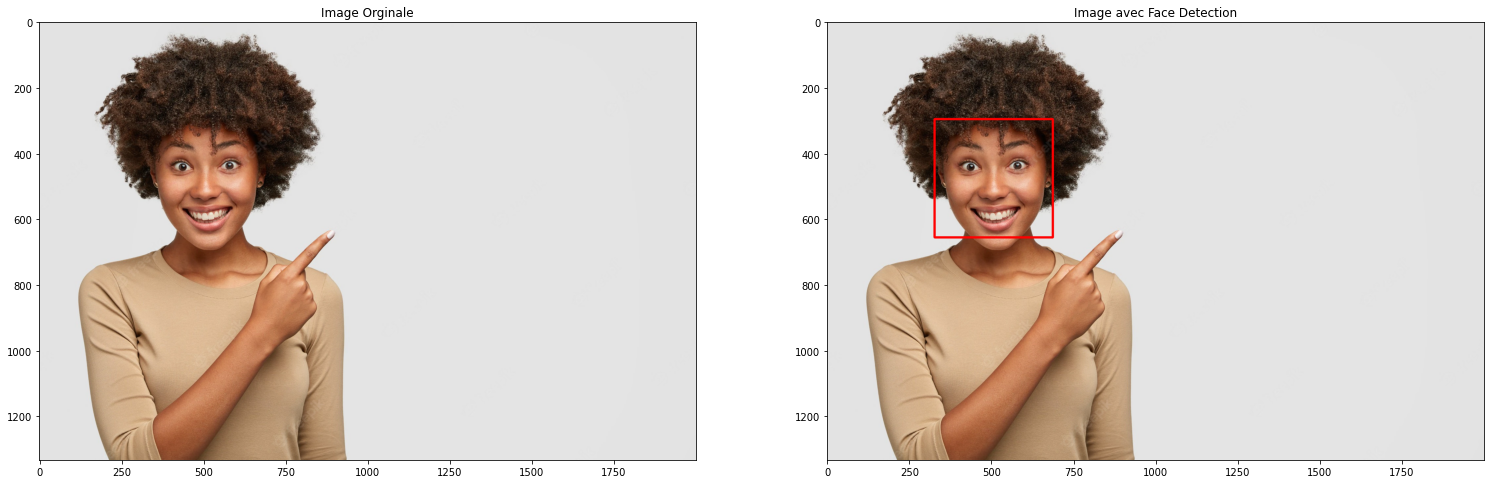

In [ ]:
import cv2

# Load the cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
# Read the input image
img = cv2.imread('/content/drive/MyDrive/photos Indabax-Workshops/face.webp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
original = img.copy()
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 5)


plt.figure(figsize=(40,40))
plt.subplot(131)
plt.imshow(original)
plt.title('Image Orginale')
plt.subplot(132)
plt.imshow(img)
plt.title('Image avec Face Detection')
plt.show()


## Exercice: Face detection + floutage

## Extraction d'information avec LayoutParser, OCR

COCO Format
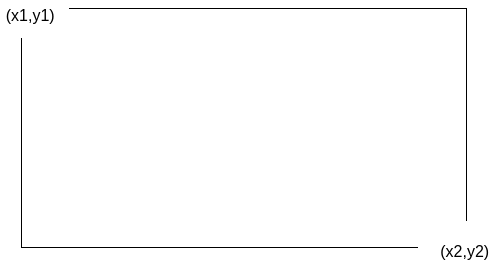

Yolo Format
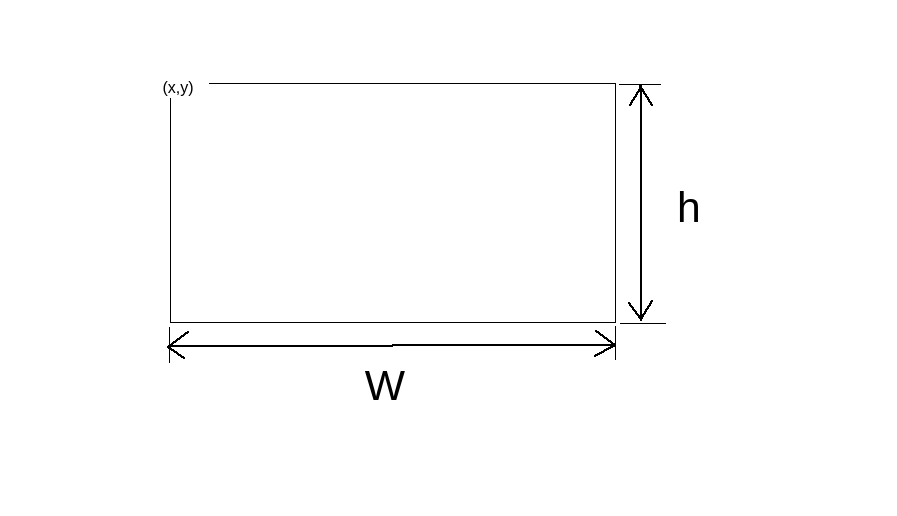

Exercice:


1.   Convertir YOLO format en Coco
2.   Implementation



In [ ]:
def yolo_to_coco(bbox):
  return bbox[:2] + [bbox[0]+bbox[2],bbox[1]+bbox[3]]

# PaddleOCR initiation et utilisation

In [ ]:
pip install inference-tools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 9.4 MB 31.3 MB/s 
     |████████████████████████████████| 295 kB 78.5 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
from paddleocr import PaddleOCR,draw_ocr
# Paddleocr supports Chinese, English, French, German, Korean and Japanese.
# You can set the parameter `lang` as `ch`, `en`, `fr`, `german`, `korean`, `japan`
# to switch the language model in order.
ocr = PaddleOCR(use_angle_cls=True, lang='ch') # need to run only once to download and load model into memory
img_path = '/content/drive/MyDrive/photos Indabax-Workshops/test5.png'
result = ocr.ocr(img_path, cls=True)
for idx in range(len(result)):
    res = result[idx]
    for line in res:
        print(line)


# draw result
from PIL import Image
result = result[0]
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
im_show = draw_ocr(image, boxes, txts, scores, font_path='/content/drive/MyDrive/photos Indabax-Workshops/simfang.ttf')
im_show = Image.fromarray(im_show)
im_show.save('result.jpg')


/usr/local/lib/python3.8/dist-packages/paddle/vision/transforms/functional_pil.py:36: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  'nearest': Image.NEAREST,
/usr/local/lib/python3.8/dist-packages/paddle/vision/transforms/functional_pil.py:37: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  'bilinear': Image.BILINEAR,
/usr/local/lib/python3.8/dist-packages/paddle/vision/transforms/functional_pil.py:38: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  'bicubic': Image.BICUBIC,
/usr/local/lib/python3.8/dist-packages/paddle/vision/transforms/functional_pil.py:39: DeprecationWarning: BOX is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BOX instead.
  'box': Image.BOX,
/usr/local/lib/python3.8/dist-packages/paddle/vision/tran

ModuleNotFoundError: ignored

In [ ]:
# Préparation environnement
import layoutparser as lp
import cv2

model = lp.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.5],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})


img = cv2.imread('/content/drive/MyDrive/photos Indabax-Workshops/test5.png')
layout_result = model.detect(img)

lp.draw_box(img, layout_result,  box_width=5, box_alpha=0.2, show_element_type=True)

config.yaml?dl=1: 8.19kB [00:00, 8.26kB/s]
model_final.pth?dl=1: 856MB [00:11, 71.4MB/s]                           


In [ ]:
layout_result.to_dict()

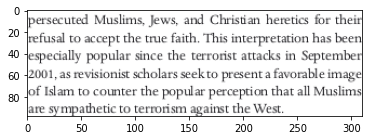

In [ ]:
import matplotlib.pyplot as plt
img = cv2.imread('/content/drive/MyDrive/photos Indabax-Workshops/test5.png')
plt.imshow(img[433:531,429:739])

In [ ]:
img.shape

(942, 777, 3)

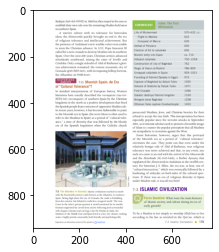

In [ ]:
plt.imshow(img)